# Preamble

Load necessary packages and data

In [1]:
from data_generator import DataGenerator
from matplotlib import pyplot
from noise_generator import NoiseGenerator
import numpy
import pandas
from utils import get_age_groups, get_short_empl_status, get_short_gender_name

## Dataset

In [2]:
CSV_FILE_BASE = 'dataset'

# data = DataGenerator.generate(10000, f"{CSV_FILE_BASE}.csv")
data = pandas.read_csv(f"{CSV_FILE_BASE}.csv")

# noisy_data = NoiseGenerator.generate(data, f"{CSV_FILE_BASE}_noisy.csv")
noisy_data = pandas.read_csv(f"{CSV_FILE_BASE}_noisy.csv")

COL_AGE = 'Age'
COL_COB = 'Country of Birth'
COL_GENDER = 'Gender'
COL_EMPL_STAT = 'Employment Status'
COL_DRINKS = 'Average Drinks per Day'
COL_DRINKS_N10 = 'Noisy Drinks 10%'
COL_DRINKS_N20 = 'Noisy Drinks 20%'
COL_DRINKS_N30 = 'Noisy Drinks 30%'
COL_DRINKS_N40 = 'Noisy Drinks 40%'
COL_DRINKS_N50 = 'Noisy Drinks 50%'
COL_DRINKS_N60 = 'Noisy Drinks 60%'
COL_DRINKS_N70 = 'Noisy Drinks 70%'
COL_DRINKS_N80 = 'Noisy Drinks 80%'
COL_DRINKS_N90 = 'Noisy Drinks 90%'
COL_DRINKS_N100 = 'Noisy Drinks 100%'

data.head()

,Age,Country of Birth,Gender,Employment Status,Average Drinks per Day
0,78,China,Female,Part-Time,0.3
1,38,India,Non-Binary,Part-Time,0.4
2,31,United States,Female,Unemployed,4.3
3,19,China,Male,Self-Employed,0.6
4,35,Mexico,Non-Binary,Self-Employed,1.5


In [3]:
def get_avg_by_age_group(d, age):
    results = []
    genders = data[COL_GENDER].unique().tolist()
    empl_stats = data[COL_EMPL_STAT].unique().tolist()

    for gender in genders:
        for empl_stat in empl_stats:
            predicates = [
                f"({COL_AGE} >= {age})",
                f"({COL_AGE} <= {age + 9})",
                f"({COL_GENDER} == '{gender}')",
                f"(`{COL_EMPL_STAT}` == '{empl_stat}')"
            ]
            query = " & ".join(predicates)
            query_results = d.query(query)
            avg = query_results[COL_DRINKS].mean()

            g = get_short_gender_name(gender)
            e = get_short_empl_status(empl_stat)

            results.append([f"{g}\n{e}", avg])

    return results

def get_graph_data(age_start, noise_pct):
    d_results = get_avg_by_age_group(data, age_start)

    noisy_data[COL_DRINKS] = noisy_data[f"Noisy Drinks {noise_pct}%"]
    n_results = get_avg_by_age_group(noisy_data, age_start)

    labels = [a[0] for a in d_results]
    d_avgs = [a[1] for a in d_results]
    n_avgs = [a[1] for a in n_results]

    return labels, d_avgs, n_avgs

def gen_graph(noise_pct):
    age_groups = get_age_groups()

    fig, axes = pyplot.subplots(nrows=3, ncols=2, figsize=(24, 24))
    axes = axes.flatten()

    for i in range(len(age_groups)):
        labels, d_avgs, n_avgs = get_graph_data(age_groups[i], noise_pct)

        x1 = numpy.arange(len(labels))
        w = 0.4
        x2 = [i + w for i in x1]
        axes[i].bar(x1, d_avgs, w, color='b', label='Data')
        axes[i].bar(x2, n_avgs, w, color='g', label=f"Data w/ {noise_pct}% Noise")
        axes[i].set_xticks(x1 + w/2, labels)
        axes[i].set_title(f"Avg by Gender, Employment Status for Age {age_groups[i]} - {age_groups[i] + 9}")
        axes[i].legend()

    pyplot.tight_layout()
    pyplot.show()

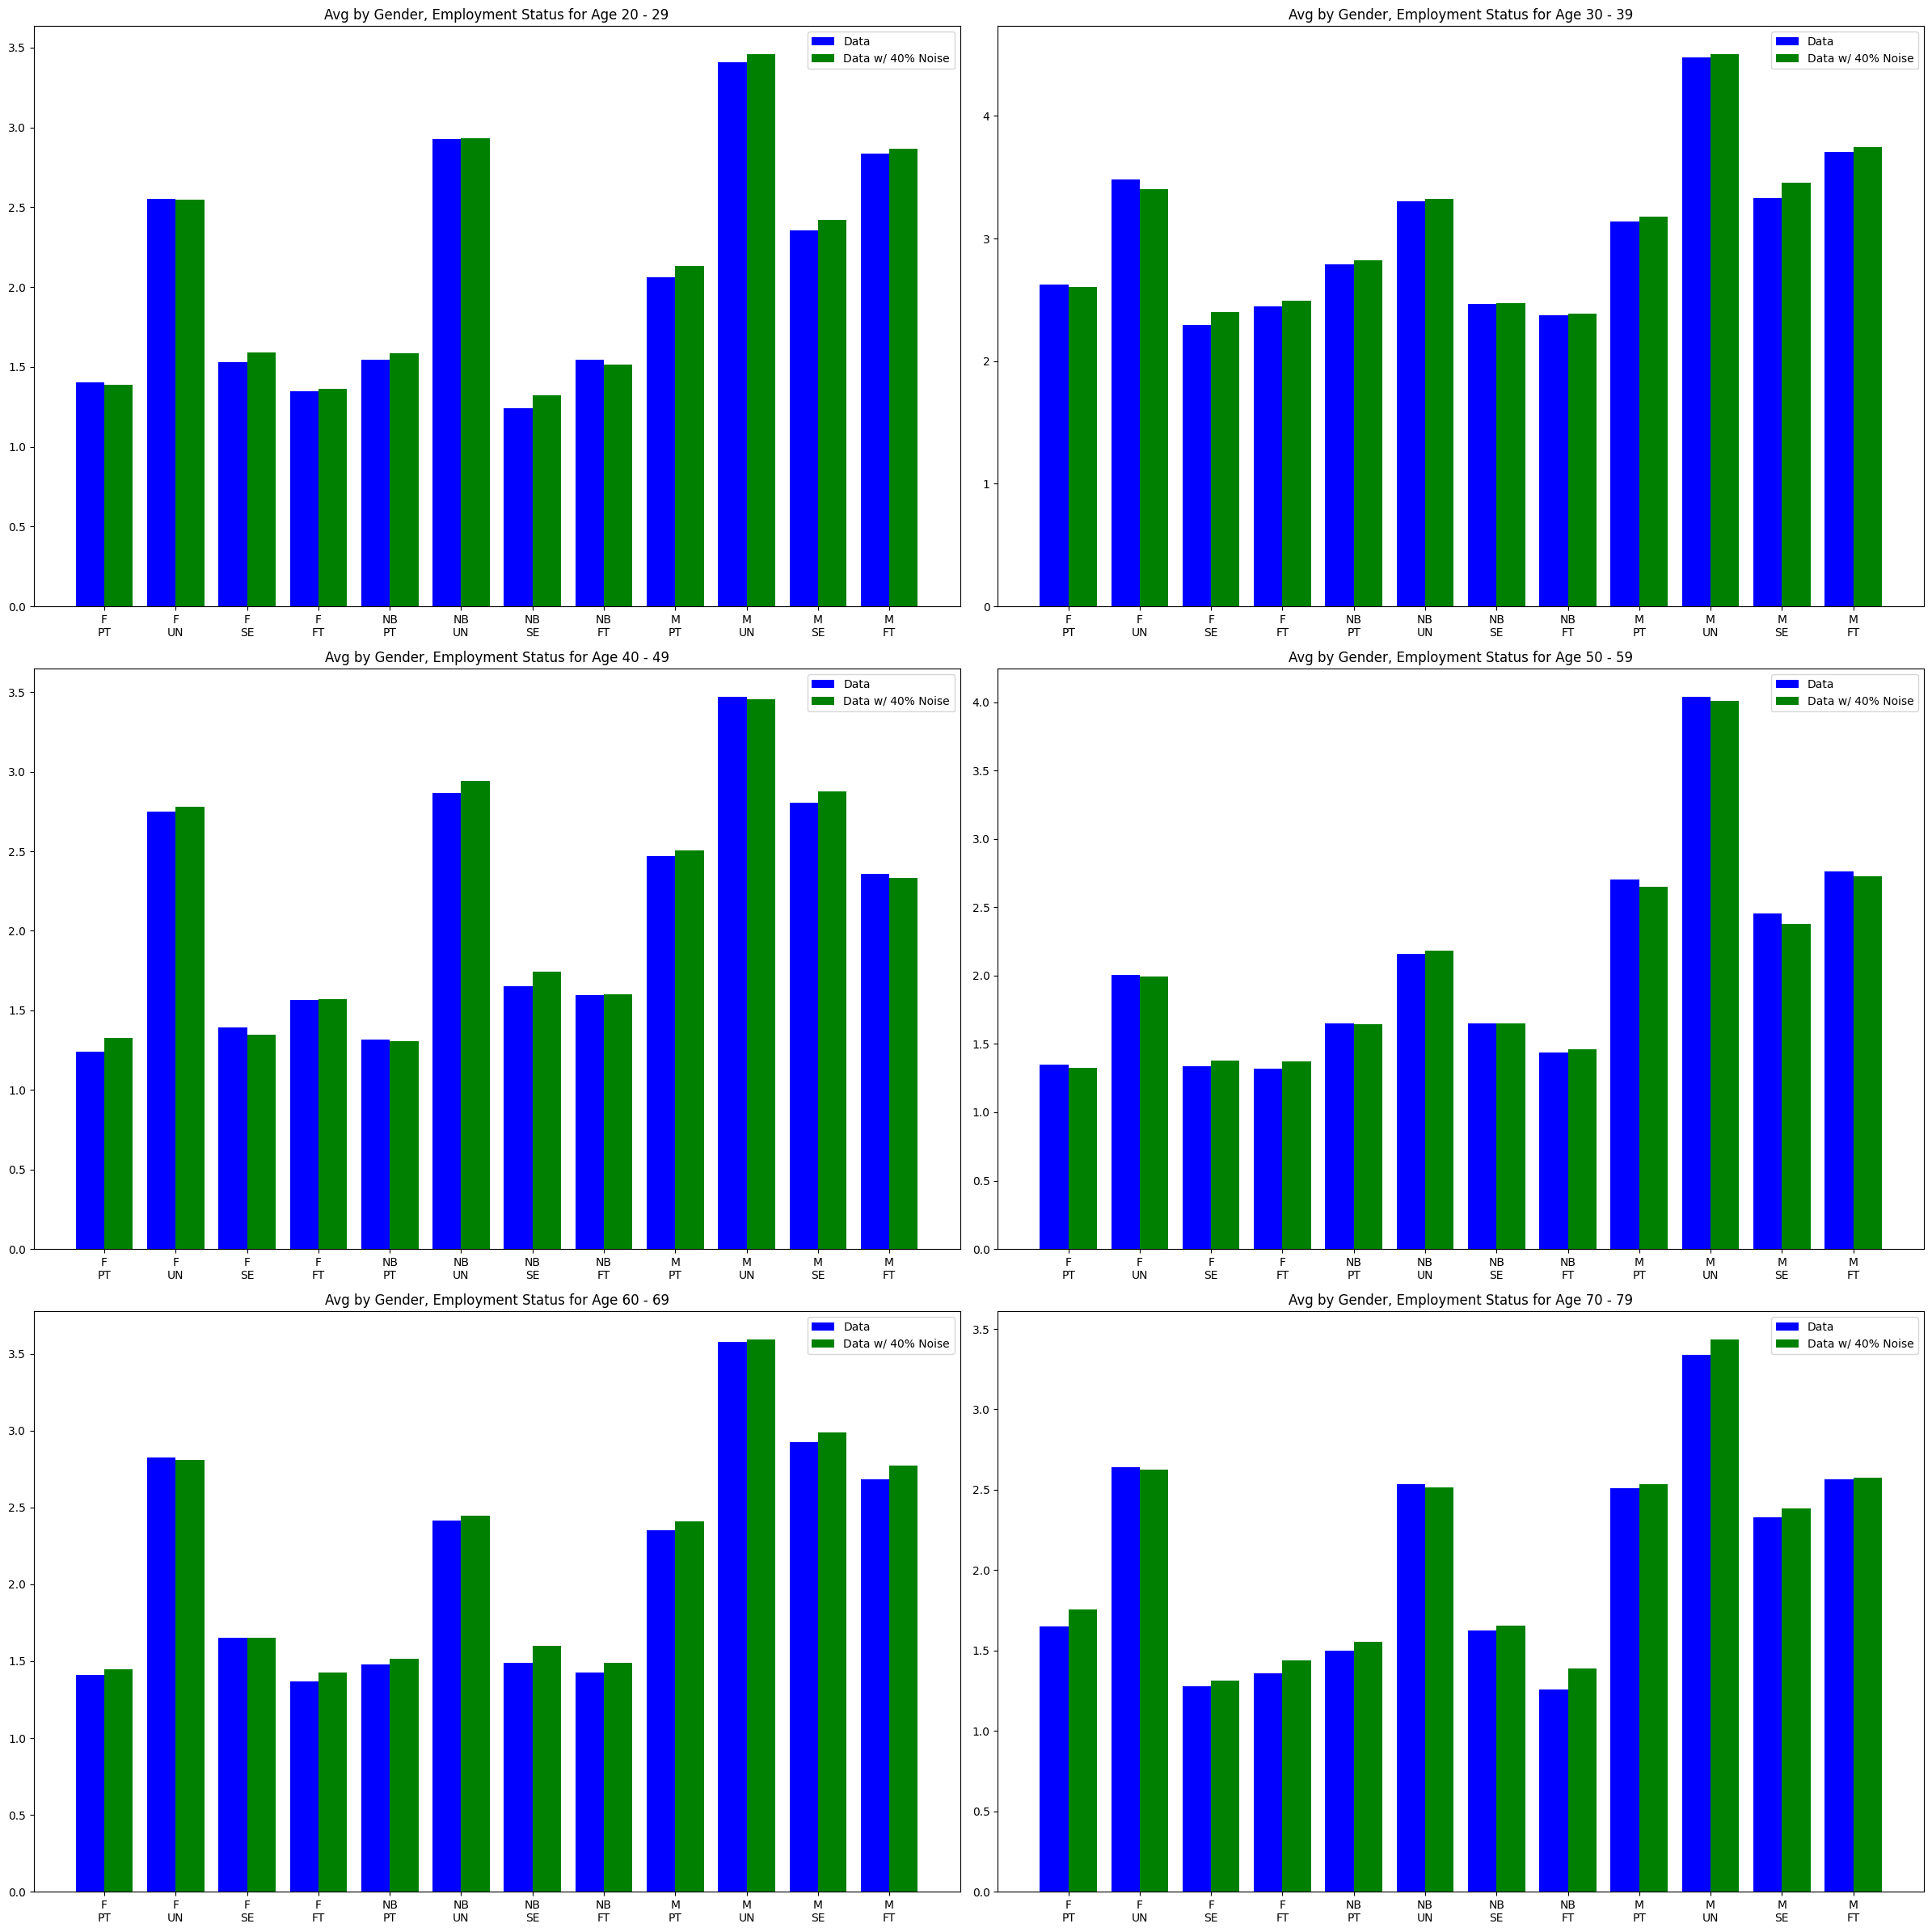

In [4]:
gen_graph(40)